In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import decomposition

## Data loading and EDA

After looking through several datasets on Kaggle, I chose this one focusing on Customer Personality Analysis (link below). This dataset looked like one you may receieve from a company asking for your analysis with several features to play around with. Dimensionality reduction may need to applied to this dataset and clustering may be a good approach to segmenting the customers in the data.

Here is the description of the features from the Kaggle site:

### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

Data retrieved from: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data?select=marketing_campaign.csv

In [2]:
df = pd.read_csv('Final/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df['Income'].isnull().sum()

24

### Dealing with missing (NaN) values

Looking at the description and info of the dataframe, it looks like all the features have 2,240 non-null values except the 'Income' column, where there are 24 NAN values. Since these rows have data in all the other columns, I won't remove them but will impute the mean income instead.

In [6]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [7]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [11]:
print(df['Dt_Customer'].dt.year.max())

2014


In [12]:
df['Customer_Age'] = 2014-df['Year_Birth']
df['Is_Parent'] = (df[['Kidhome','Teenhome']].sum(axis=1) > 0).astype(int)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,57,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,60,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,49,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,30,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,33,1


In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2240.0,52247.251354,1730.0,35538.75,51741.5,68289.75,666666.0,25037.797168
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


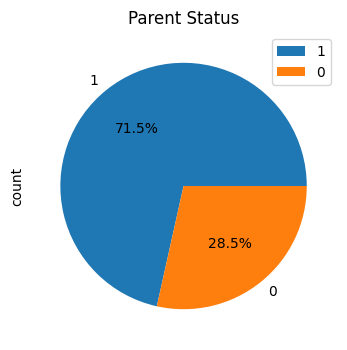

In [14]:
fig = plt.figure(figsize=(4,4))
df['Is_Parent'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Parent Status")
plt.legend()
plt.show()

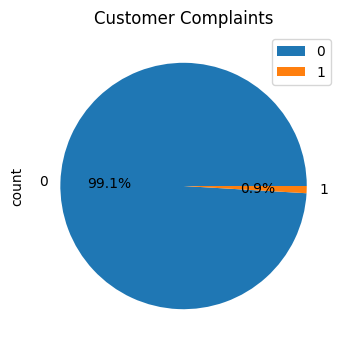

In [15]:
fig = plt.figure(figsize=(4,4))
df['Complain'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Customer Complaints")
plt.legend()
plt.show()

In [16]:
print(df.Complain.sum(), ' customers out of ', df.ID.nunique(), ' have complained.')

21  customers out of  2240  have complained.


#### I added 'Customer_Age' as a feature and also 'Is_Parent' to be able to cluster certain groups together. However, after I made the "Customer_Age" column based off of the current year, I noticed the max age was 130, so this data set must be quite old. I printed out the max year of the 'Dt_Customer' feature to get the last year of the data, whish was 2014. So I used 2014 to calculate the age of the customers. I made a simple scatterplot below to see how age compares to income and noticed an income outlier of over 600,000. Since there is only the single one so far from the others, I will remove that one from the dataset

In [17]:
df = df.drop(df[df['Income']>600000].index)

<Axes: xlabel='Customer_Age', ylabel='Income'>

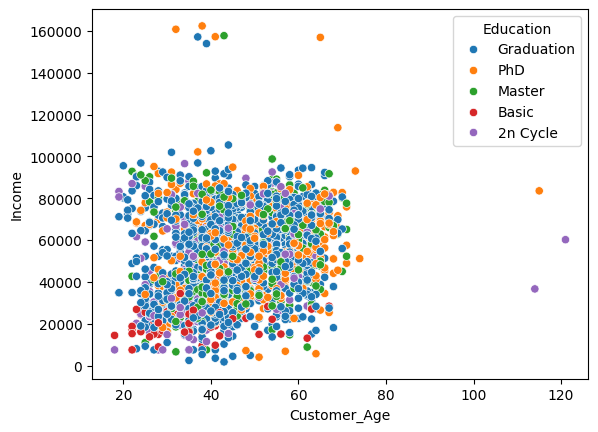

In [18]:
sns.scatterplot(data=df, x='Customer_Age', y='Income', hue='Education')

#### After calculating the customer age and seeing the data description and scatter plot, it looks like there are 3 customers over the age of 100. I'll remove those outliers to better analyze the data.

In [19]:
df = df.drop(df[df['Customer_Age']>100].index)

<Axes: xlabel='Customer_Age', ylabel='Income'>

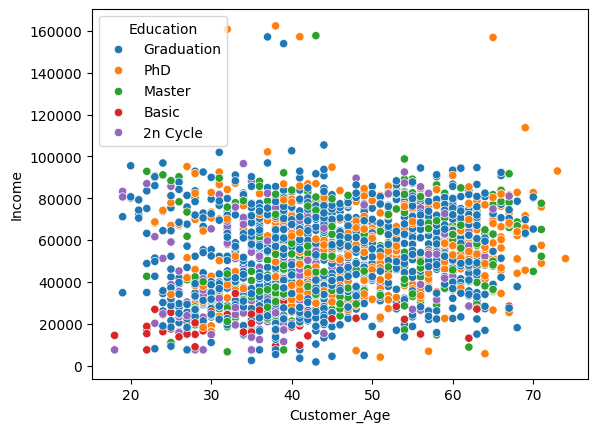

In [20]:
sns.scatterplot(data=df, x='Customer_Age', y='Income', hue='Education')

<Axes: xlabel='Income'>

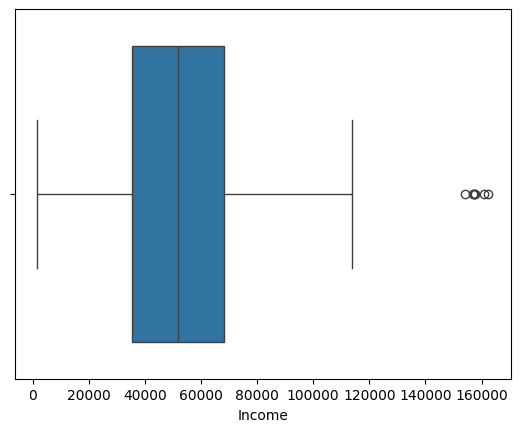

In [21]:
sns.boxplot(data=df, x='Income')

<Axes: xlabel='Income', ylabel='Count'>

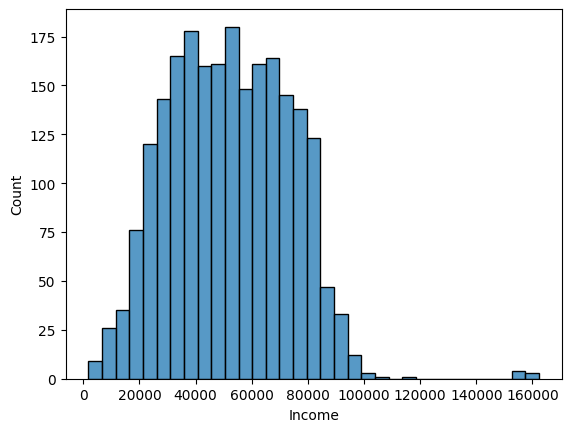

In [22]:
sns.histplot(data=df, x='Income')

A few data insights so far:

* Almost 75% of the customers are parents
* After dropping the highest outlier income and oldest customers, you can clearly see the general range of customer ages between 20 and 70 with income ranging from 20,000 to 100,000 with a few above that. Most of the higher income and older customers have a PhD.
* We also saw that less than 1% of customers have complained, this was 20 out of 2,236 unique customers

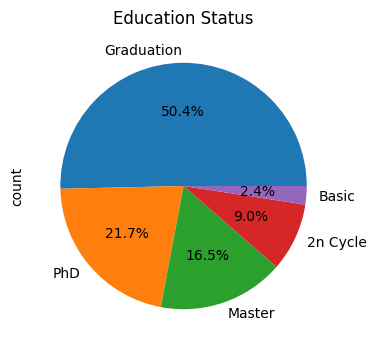

In [23]:
fig = plt.figure(figsize=(4,4))
df['Education'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Education Status")
plt.show()

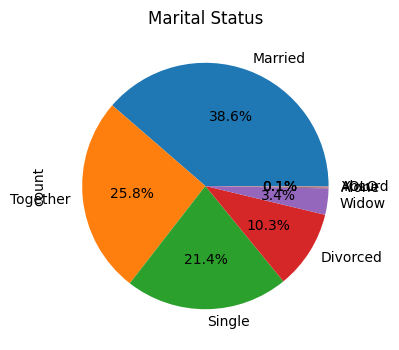

In [24]:
fig = plt.figure(figsize=(4,4))
df['Marital_Status'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title("Marital Status")
plt.show()

After changing the 'Dt_Customer' field to datetime, the only remaining non-numeric fields are 'Marital_Status' and 'Education'. We can simplify the fields and then use LabelEncoder to use dummy variables for representing the strings. 

In [25]:
df['Education'] = df['Education'].replace({
    'Basic': 'Undergrad', 
    '2n Cycle': 'Undergrad',
    'Graduation': 'Graduate',
    'Master': 'Postgrad',
    'PhD': 'Postgrad'})

In [26]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Marital_Status
Married     0.386404
Together    0.258497
Single      0.214222
Divorced    0.103309
Widow       0.034436
Alone       0.001342
Absurd      0.000894
YOLO        0.000894
Name: proportion, dtype: float64

I'm not sure what YOLO and Absurd are, but they are a small percentage of the data and I will combine them with ALone and Single. Married and Together can be combined as well.

In [27]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Together',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

In [28]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Marital_Status
Together    0.644902
Single      0.217352
Divorced    0.103309
Widow       0.034436
Name: proportion, dtype: float64

In [29]:
df.Education.value_counts(dropna=False, normalize=True)

Education
Graduate     0.503578
Postgrad     0.382379
Undergrad    0.114043
Name: proportion, dtype: float64

### Label Encoding

In [30]:
le = LabelEncoder()
le.fit(df['Education'])
df['Education'] = le.transform(df['Education'])
education_dict = dict(zip(le.classes_, range(len(le.classes_))))
le.fit(df['Marital_Status'])
df['Marital_Status'] = le.transform(df['Marital_Status'])
marital_dict = dict(zip(le.classes_, range(len(le.classes_))))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Age,Is_Parent
0,5524,1957,0,1,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,57,0
1,2174,1954,0,1,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,60,1
2,4141,1965,0,2,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,49,0
3,6182,1984,0,2,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,30,1
4,5324,1981,1,2,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,33,1


In [31]:
education_dict

{'Graduate': 0, 'Postgrad': 1, 'Undergrad': 2}

In [32]:
marital_dict

{'Divorced': 0, 'Single': 1, 'Together': 2, 'Widow': 3}

In [33]:
df['Total_Spent'] = df.apply(lambda row: row['MntWines' : 'MntGoldProds'].sum(),axis=1)

In [34]:
df.loc[:,'MntWines':'MntGoldProds'].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [35]:
df['Total_Spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Spent, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   int64         
 3   Marital_Status       2236 non-null   int64         
 4   Income               2236 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

/var/folders/_v/b_9_tjgd1wj5x9tpptbjt_180000gp/T/ipykernel_3327/4037926212.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])
/var/folders/_v/b_9_tjgd1wj5x9tpptbjt_180000gp/T/ipykernel_3327/4037926212.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col])


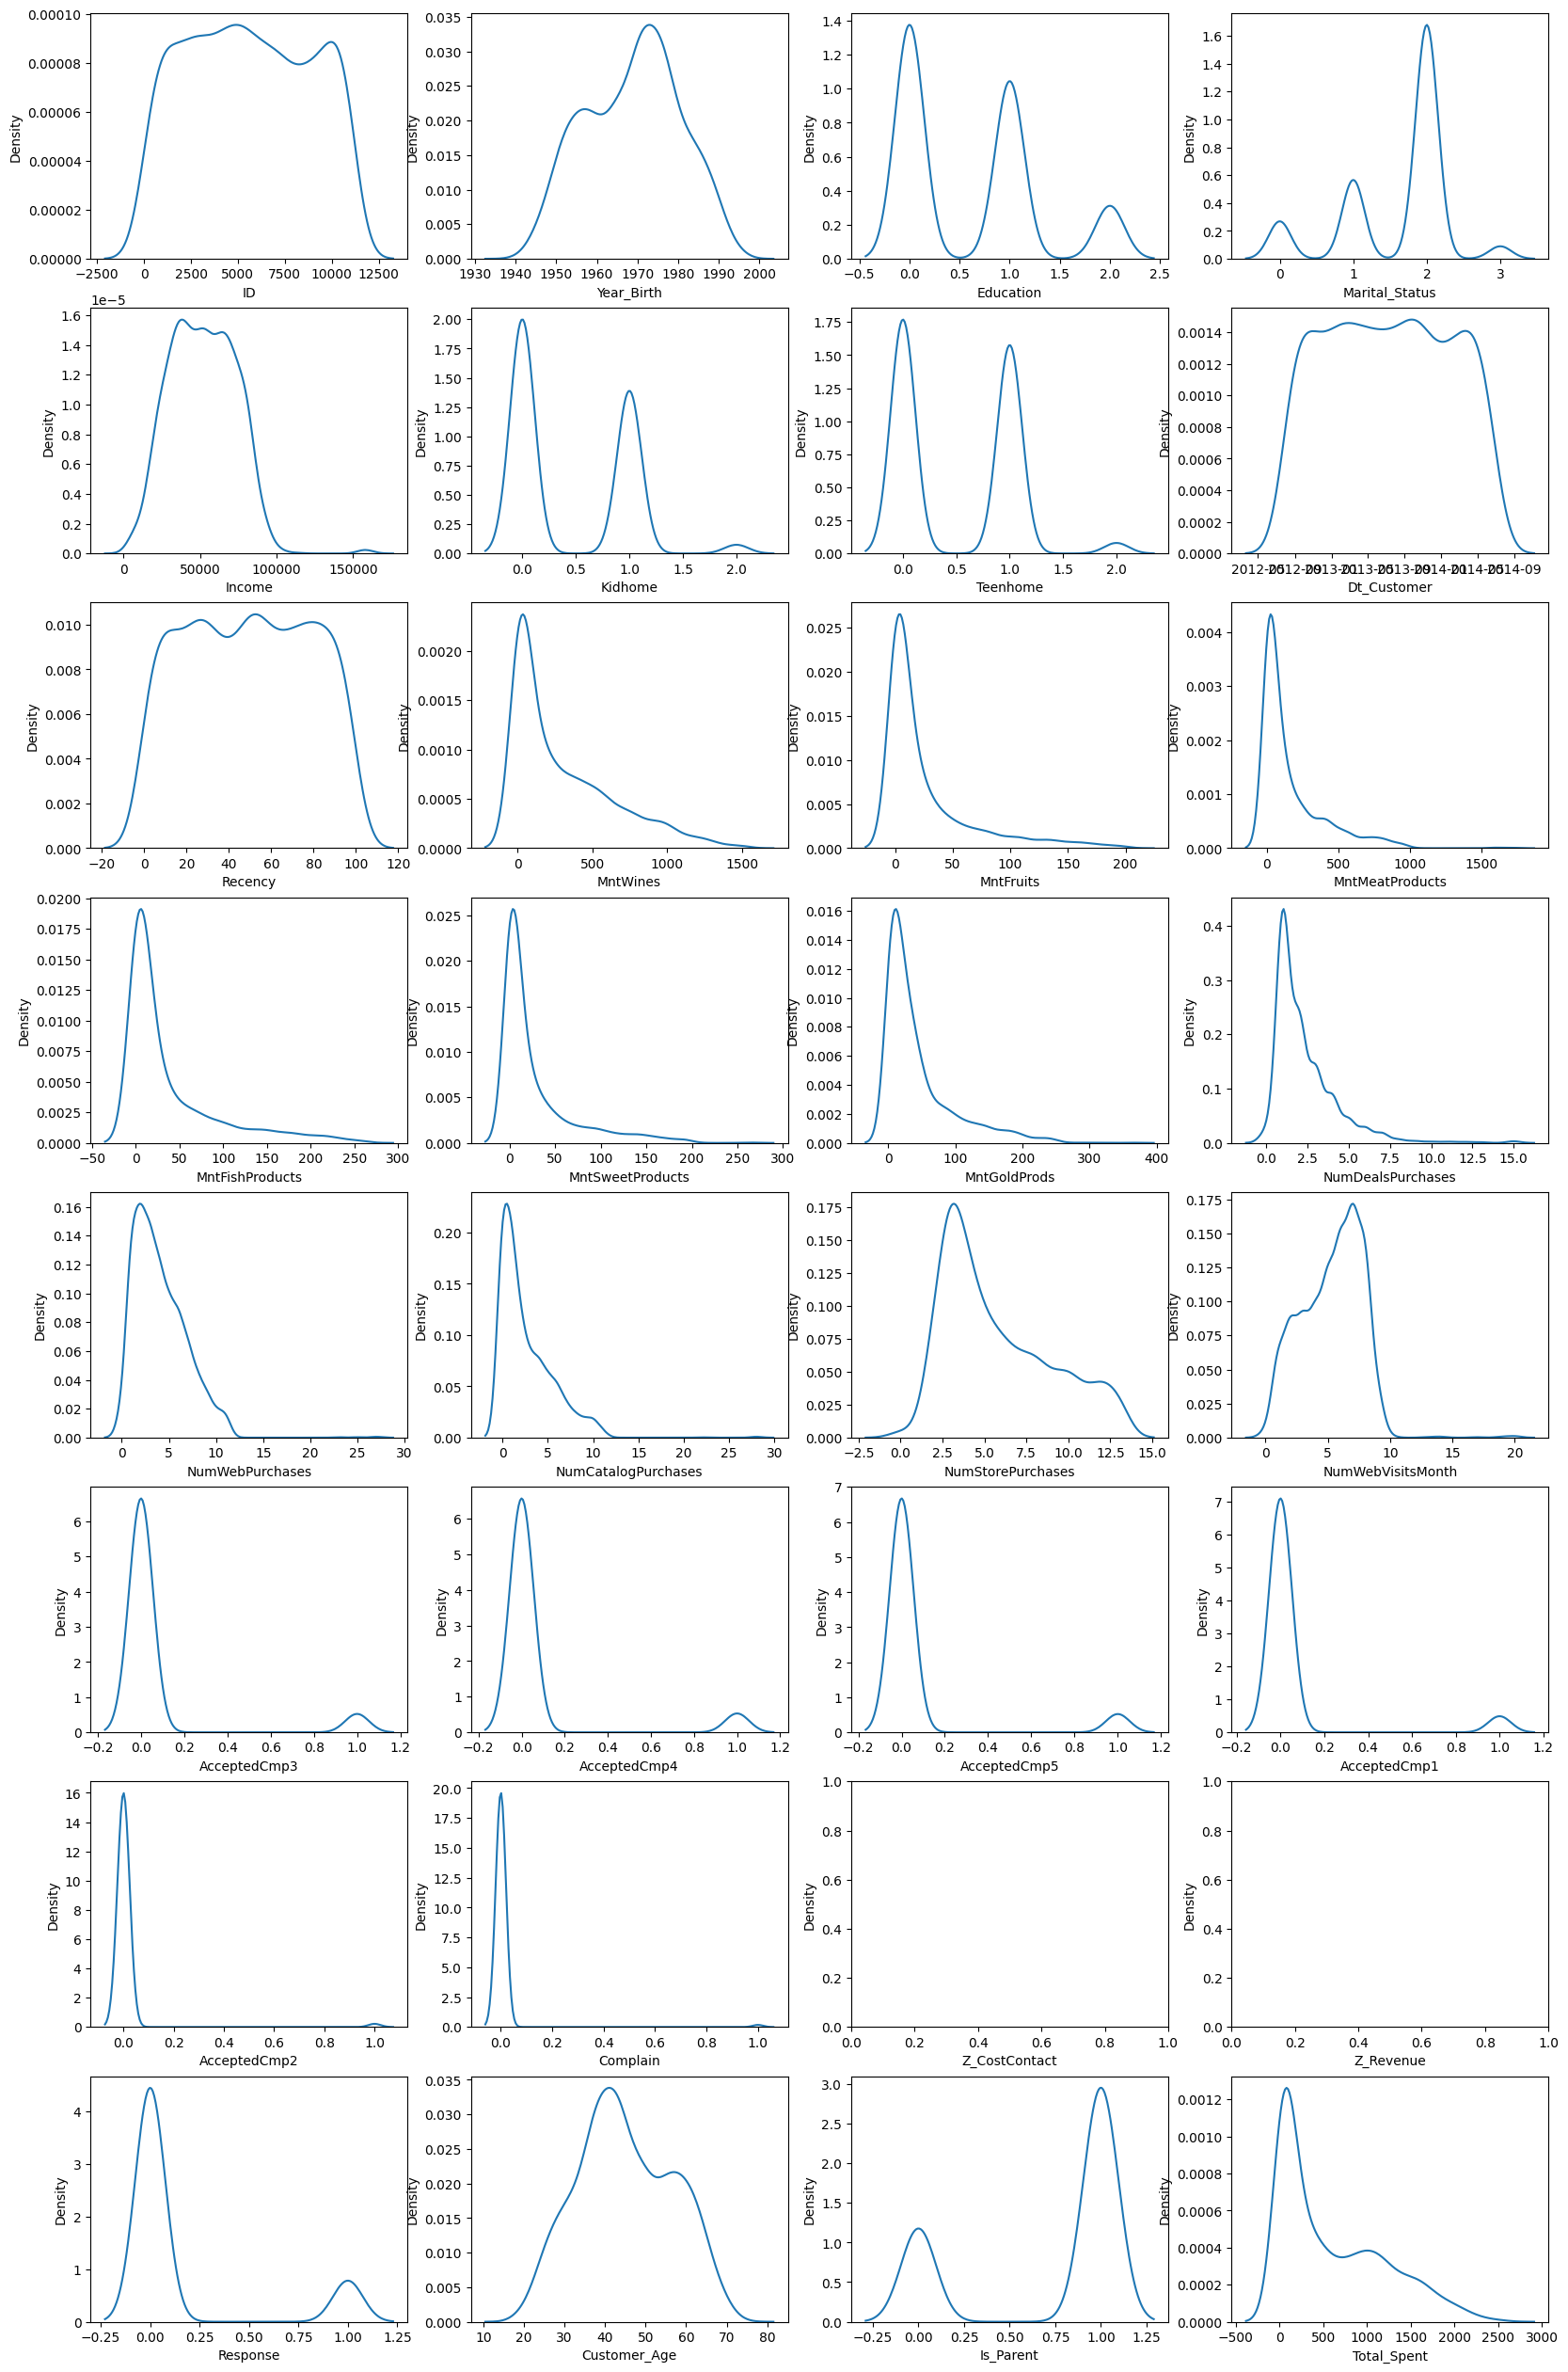

In [37]:
plt.figure(figsize=(20,40))
i=1
for col in df.columns:
    plt.subplot(10,4,i)
    sns.kdeplot(df[col])
    i+=1

In [38]:
df['Z_CostContact'].unique().tolist()

[3]

In [39]:
df['Z_Revenue']

0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2236, dtype: int64

In [40]:
df['ID'].nunique()

2236

#### Split apart customer start date into day, month, year. Then we can drop 'Dt_Customer'

In [41]:
df['Start_Day'] = df['Dt_Customer'].dt.day
df['Start_Year'] = df['Dt_Customer'].dt.year
df['Start_Month'] = df['Dt_Customer'].dt.month

#### The columns 'Z_CostContact' and 'Z_Revenue' contain the same numbers throughout the dataset so they can be dropped. The 'Complain' field also provided little usefulness so it can be removed.

In [42]:
to_drop = ['Z_CostContact', 'Z_Revenue', 'Complain', 'ID', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Dt_Customer']
cleaned_df = df.drop(to_drop, axis=1, errors='ignore')

In [43]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2236.0,0.610465,0.682709,0.0,0.0,0.0,1.00,2.0
Marital_Status,2236.0,1.610465,0.716602,0.0,1.0,2.0,2.00,3.0
Income,2236.0,51961.906544,21411.404811,1730.0,35502.5,51684.0,68275.75,162397.0
Kidhome,2236.0,0.444097,0.538459,0.0,0.0,0.0,1.00,2.0
Teenhome,2236.0,0.506708,0.544609,0.0,0.0,0.0,1.00,2.0
Recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
MntWines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
MntFruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
MntMeatProducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
MntFishProducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0


#### Move 'Income' to the first column for correlation

In [44]:
income = cleaned_df.pop('Income')
cleaned_df.insert(0, 'Income', income)

## Correlation Matrix

<Axes: >

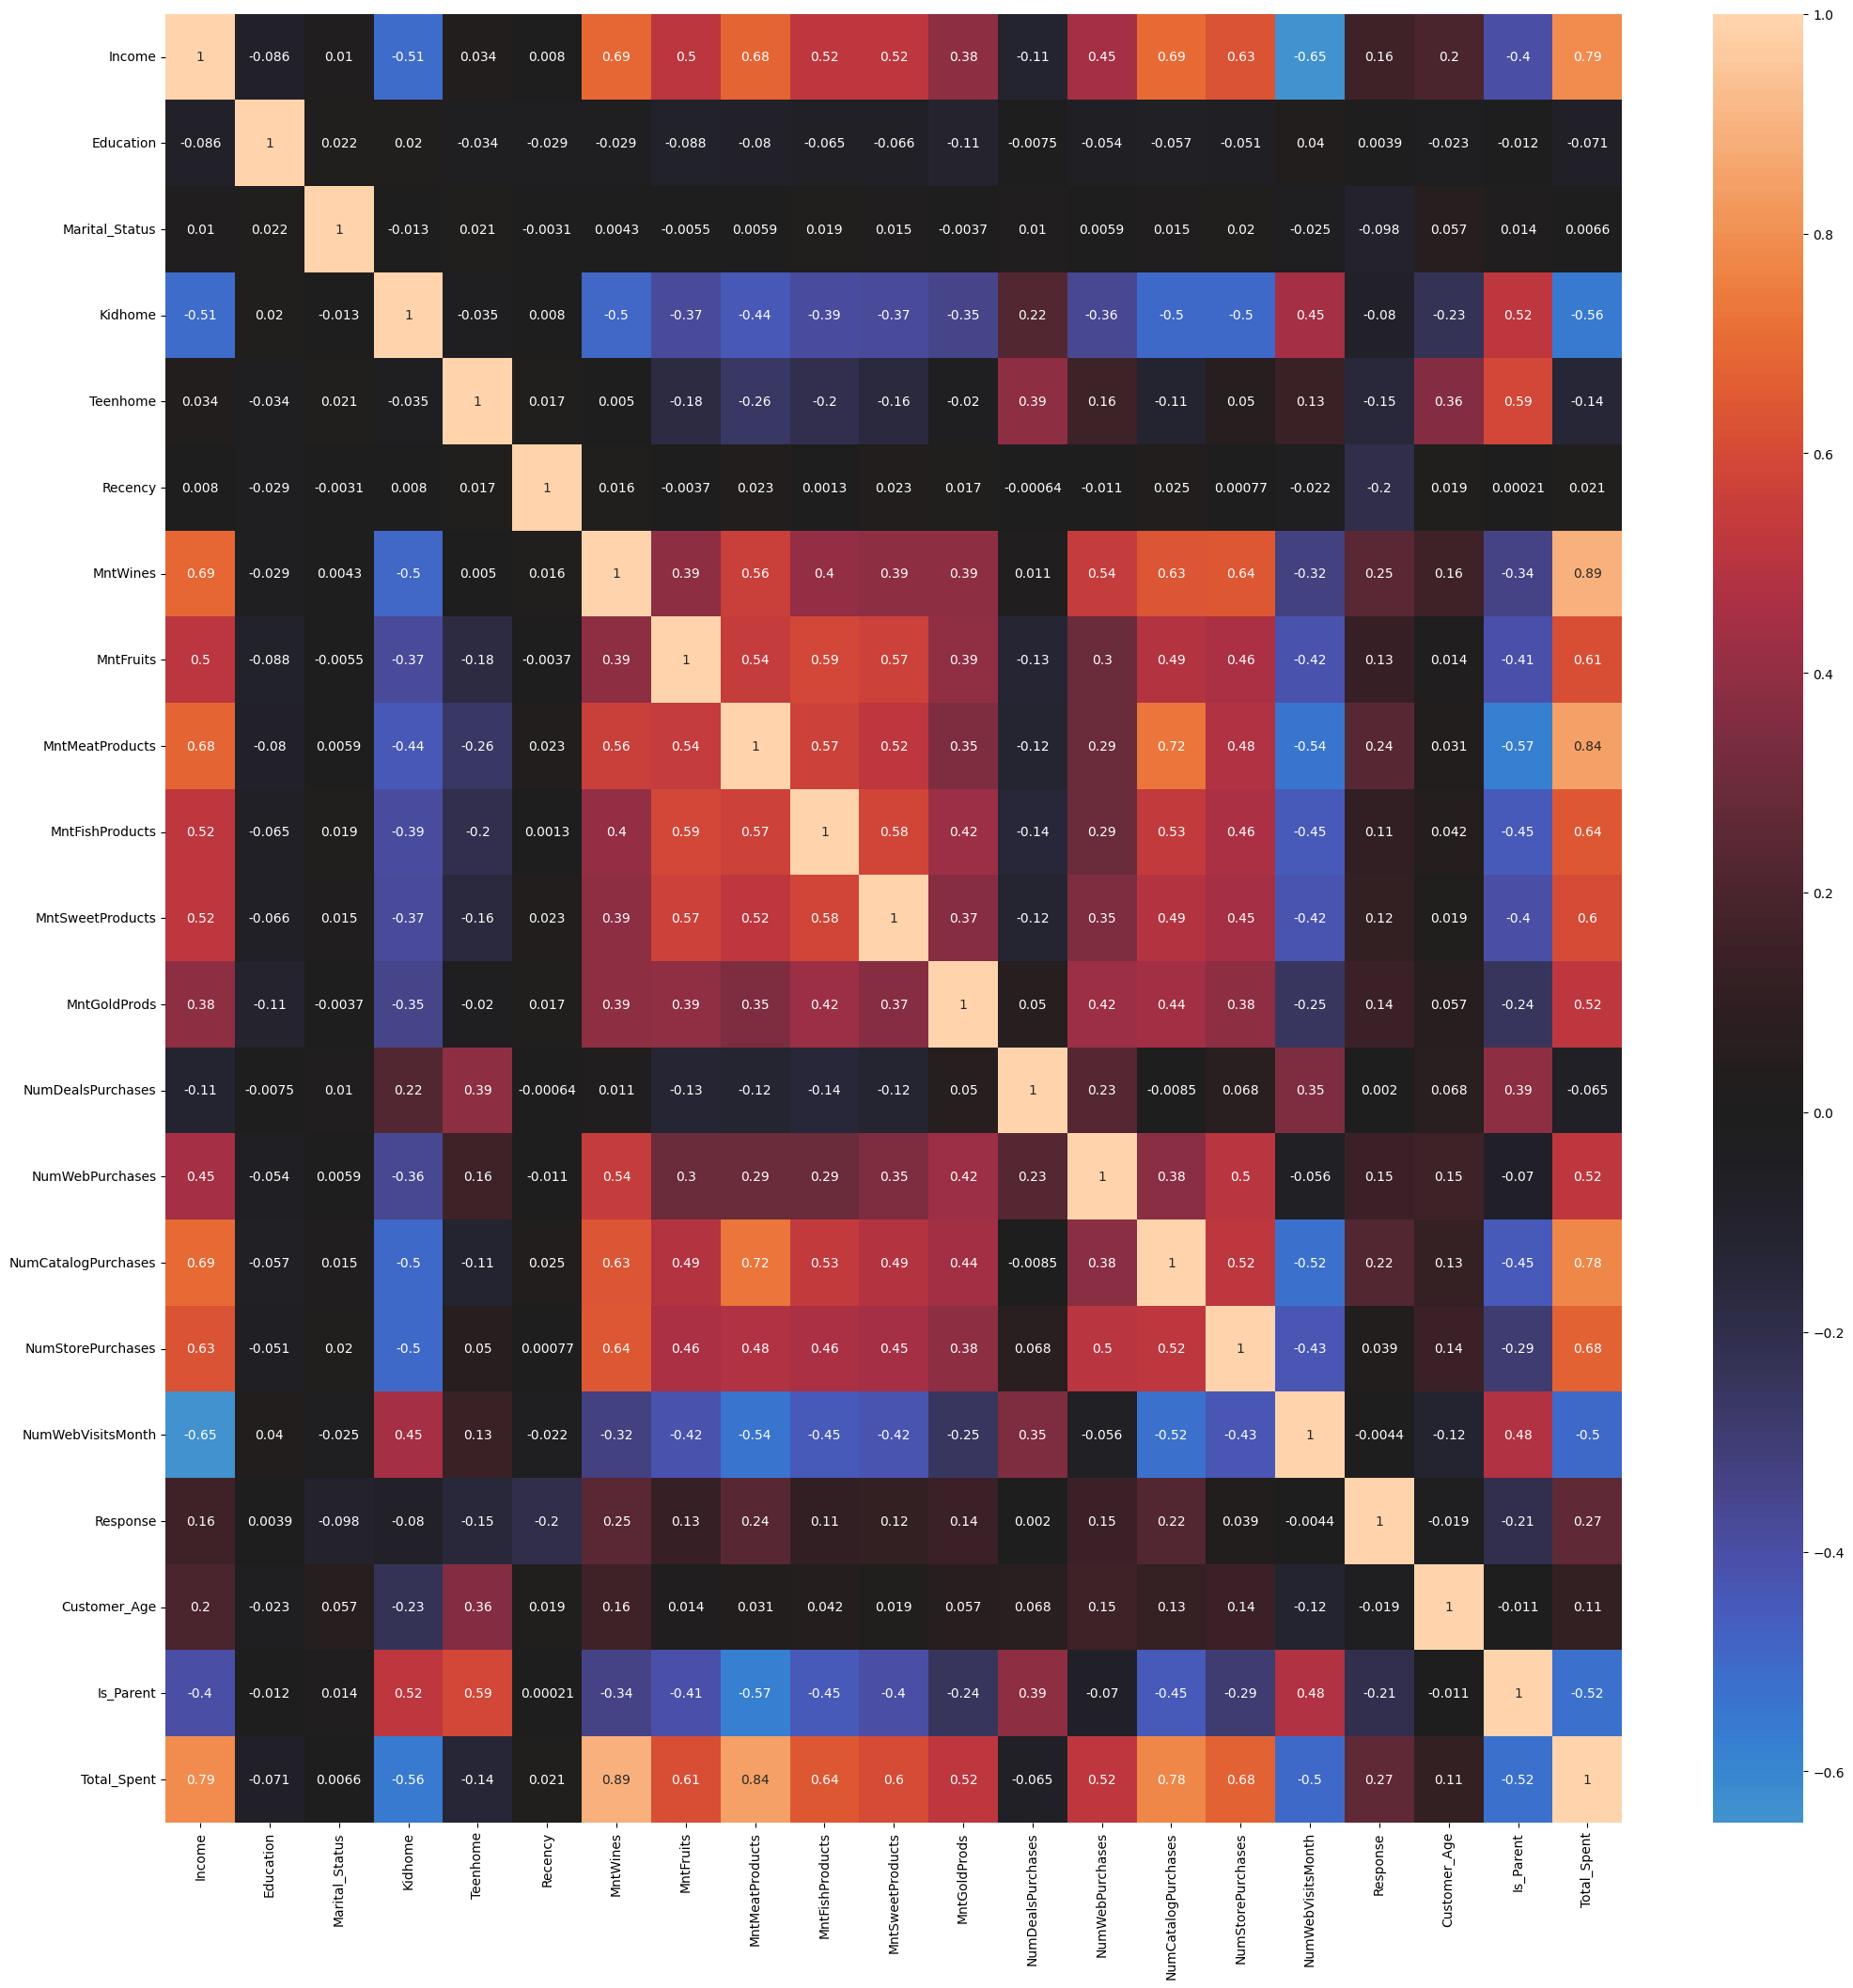

In [45]:
numerical_data = cleaned_df.select_dtypes(include=['int64', 'float64'])
corrmat= numerical_data.corr()
plt.figure(figsize=(25,25))  
sns.heatmap(corrmat, annot=True, center=0)

## Scaling the Data

Since we have a wide range of scales in the variables, it would be best to scale the data before building our clustering models. We can use Sklearn's Standard Scaler for this

In [46]:
scaler = StandardScaler()
scaler.fit(cleaned_df)
scaled = pd.DataFrame(scaler.fit_transform(cleaned_df),columns= cleaned_df.columns)

In [47]:
scaled.head()

,Income,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Customer_Age,Is_Parent,Total_Spent,Start_Day,Start_Year,Start_Month
0,0.288513,-0.89438,-0.852079,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,2.509801,-0.552429,0.692865,2.386338,1.016868,-1.584362,1.680176,-1.324172,-1.500981,0.726475
1,-0.262438,-0.89438,-0.852079,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.568970,-1.167738,-0.131421,-0.419052,1.273264,0.631169,-0.962202,-0.868919,1.419988,-0.993679
2,0.917992,-0.89438,0.543707,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.226884,1.293496,-0.543564,-0.419052,0.333146,-1.584362,0.282541,0.610651,-0.040496,0.439783
3,-1.182621,-0.89438,0.543707,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.911056,-0.552429,0.280722,-0.419052,-1.290693,0.631169,-0.918994,-0.641293,1.419988,-1.280371
4,0.295754,0.57070,0.543707,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,0.115201,0.062879,-0.131421,-0.419052,-1.034298,0.631169,-0.305762,0.383025,1.419988,-1.567064


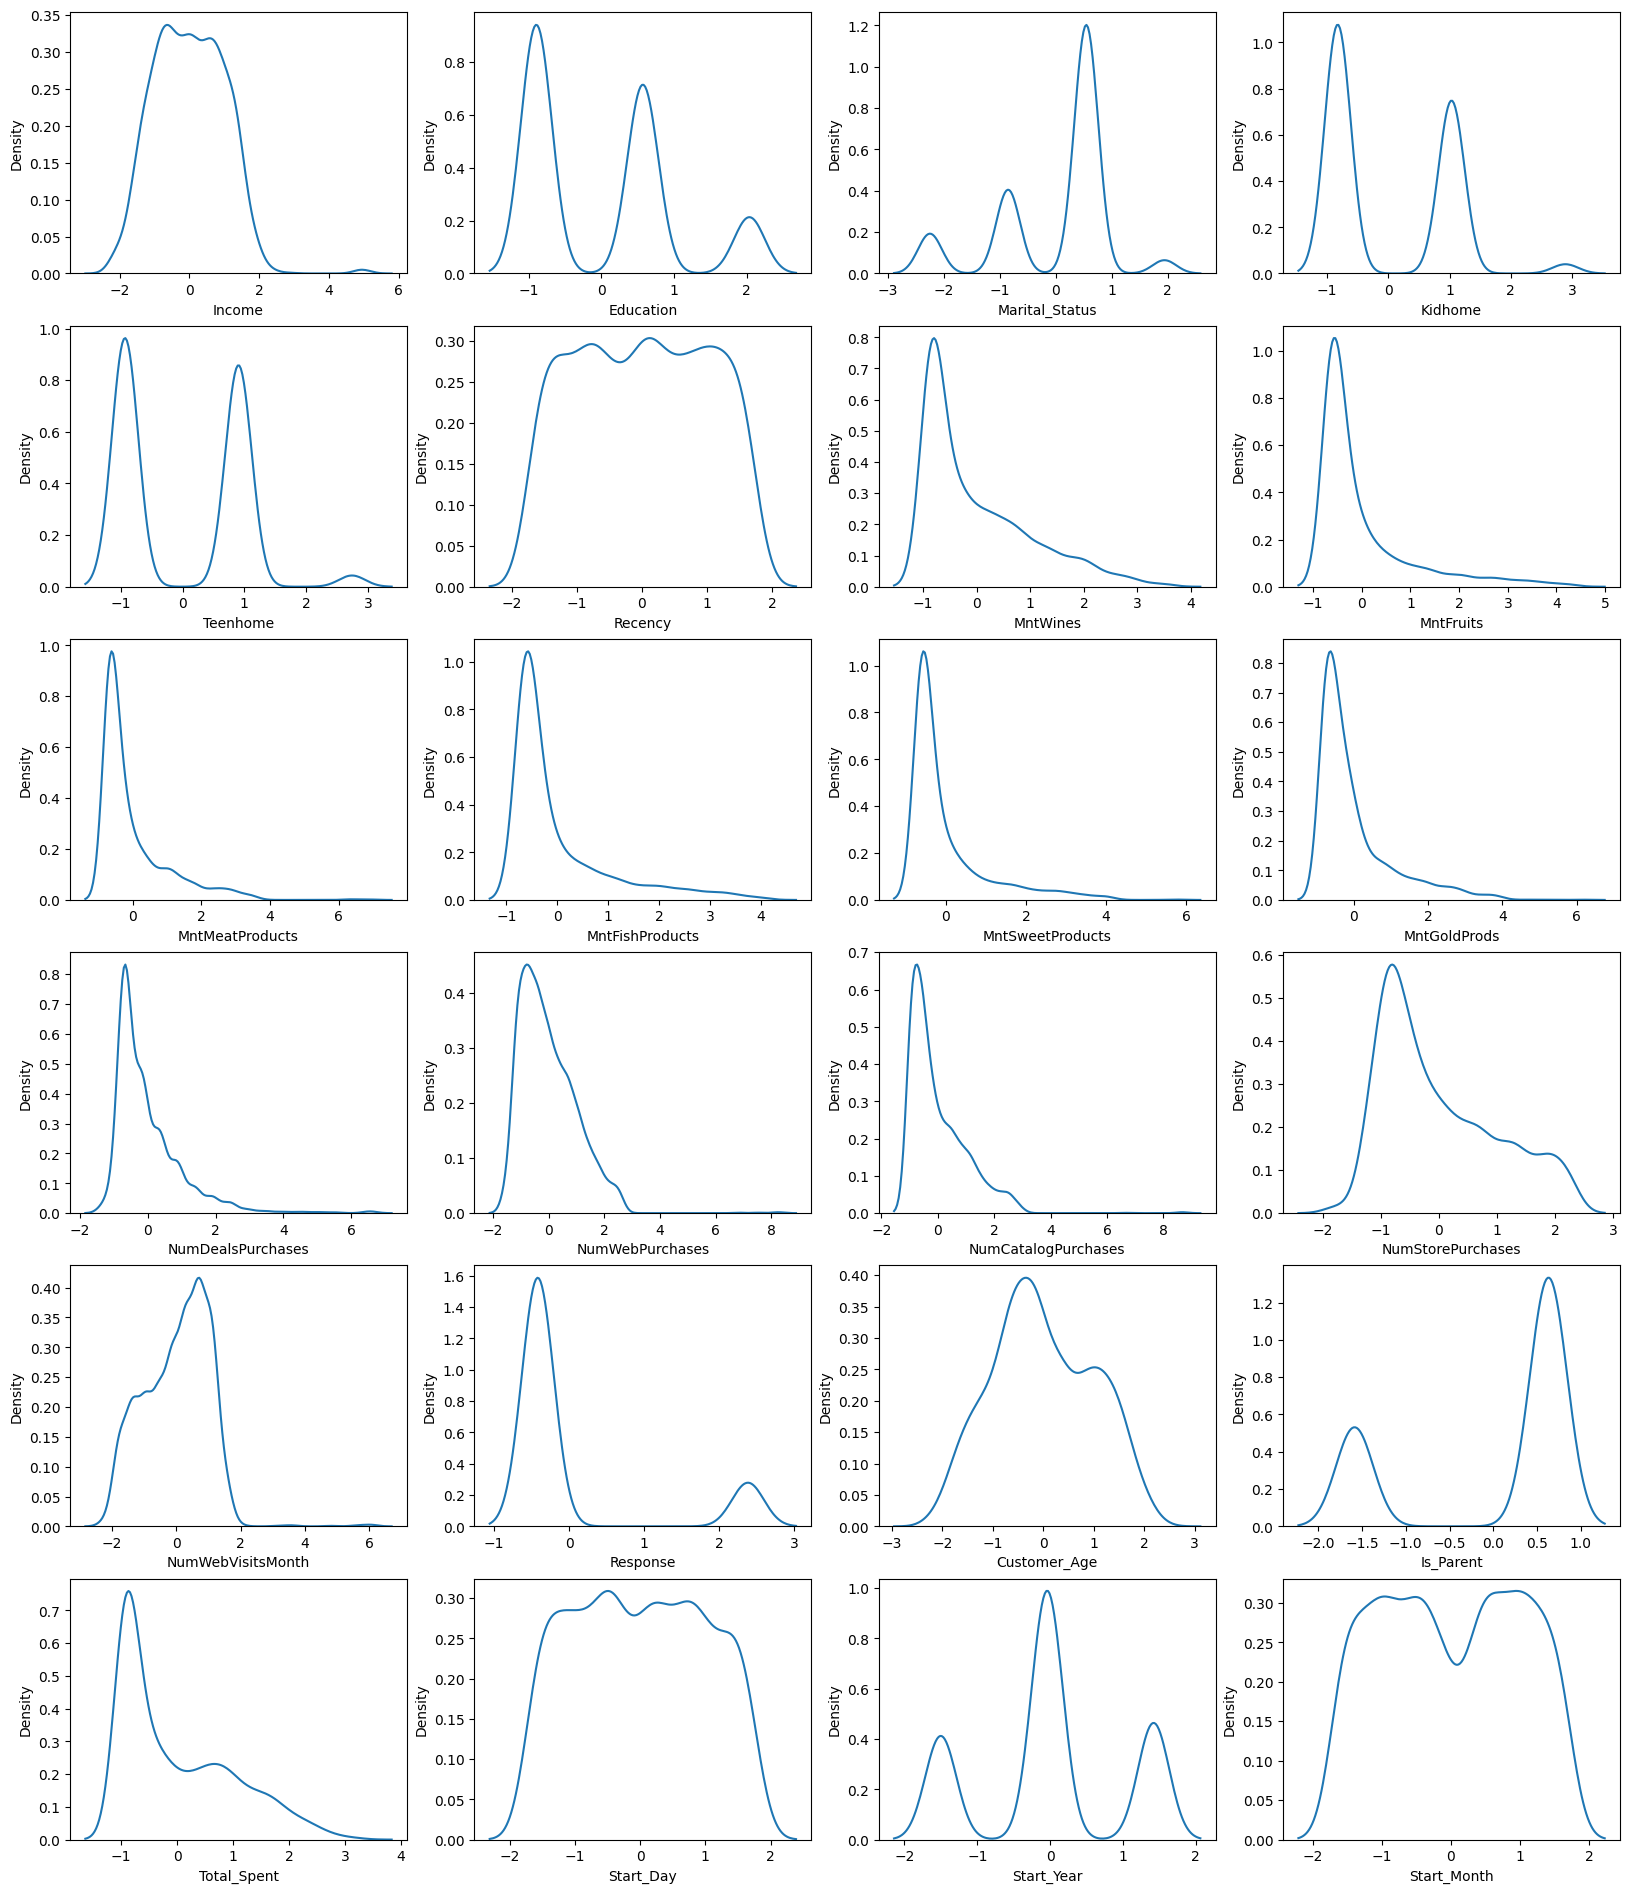

In [48]:
plt.figure(figsize=(20,40))
i=1
for col in scaled.columns:
    plt.subplot(10,4,i)
    sns.kdeplot(scaled[col])
    i+=1

## Dimensionality Reduction

We can perform Dimensionality Reduction on the scaled data with PCA (Principal Component Analysis). Projecting a higher dimensional space onto a lower dimensional sub space can help remove unnecessary portions of the data. We will try it with 3 components on the scaled data.

In [49]:
pca = decomposition.PCA(n_components=3)
pca.fit(scaled)
pca_df = pd.DataFrame(pca.fit_transform(scaled), columns=(['col1','col2','col3']))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,3.177740e-17,2.746585,-5.400194,-2.517143,-0.758005,2.385166,7.505796
col2,2236.0,2.542192e-17,1.517377,-3.492246,-1.168398,-0.234937,1.059988,5.041826
col3,2236.0,1.271096e-17,1.337557,-3.208789,-0.949102,-0.062032,0.949883,4.168584


## K-Means Clustering

Now that we have our reduced and scaled data, we can now apply K-Means clustering to group the observations. Since we are unsure about the number of clusters k, we'll use the elbow method by creating a line chart visualization based on the Sum of Squared Error (SSE).

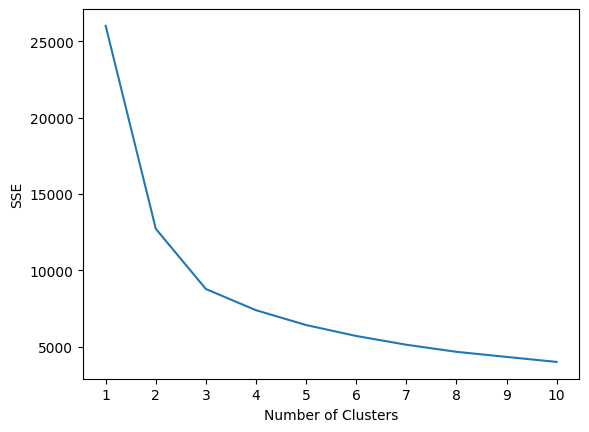

In [50]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The bend at k=3 indicates that 3 is the optimal number of clusters for this data.

In [51]:
km = KMeans(n_clusters=3, random_state=1, n_init='auto')
km.fit(pca_df)
pca_df['Cluster'] = km.labels_
pca_df.head(10)

,col1,col2,col3,Cluster
0,4.707610,0.449623,2.587182,1
1,-2.616937,-0.464594,-2.132870,0
2,2.216672,-0.522273,0.034032,1
3,-2.785084,-1.689911,-0.805519,0
4,-0.595936,-0.510790,-1.283352,0
5,0.710652,1.377374,-0.316119,2
6,0.616393,1.888981,1.176729,2
7,-2.497228,-0.689817,0.782566,0
8,-2.835982,-0.880873,1.593040,0
9,-4.854659,0.619501,-0.451336,0


In [52]:
cleaned_df['Cluster'] = km.labels_
cleaned_df.head(10)

,Income,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,Response,Customer_Age,Is_Parent,Total_Spent,Start_Day,Start_Year,Start_Month,Cluster
0,58138.0,0,1,0,0,58,635,88,546,172,...,4,7,1,57,0,1617,4,2012,9,1
1,46344.0,0,1,1,1,38,11,1,6,2,...,2,5,0,60,1,27,8,2014,3,0
2,71613.0,0,2,0,0,26,426,49,127,111,...,10,4,0,49,0,776,21,2013,8,1
3,26646.0,0,2,1,0,26,11,4,20,10,...,4,6,0,30,1,53,10,2014,2,0
4,58293.0,1,2,1,0,94,173,43,118,46,...,6,5,0,33,1,422,19,2014,1,0
5,62513.0,1,2,0,1,16,520,42,98,0,...,10,6,0,47,1,716,9,2013,9,2
6,55635.0,0,0,0,1,34,235,65,164,50,...,7,6,0,43,1,590,13,2012,11,2
7,33454.0,1,2,1,0,32,76,10,56,3,...,4,8,0,29,1,169,8,2013,5,0
8,30351.0,1,2,1,0,19,14,0,24,3,...,2,9,1,40,1,46,6,2013,6,0
9,5648.0,1,2,1,1,68,28,0,6,1,...,0,20,0,64,1,49,13,2014,3,0


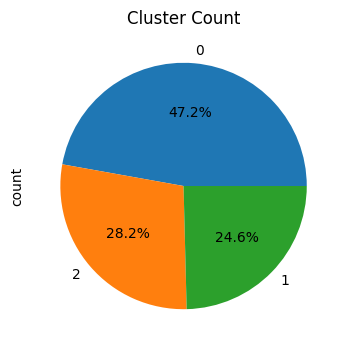

In [53]:
fig = plt.figure(figsize=(4,4))
cleaned_df['Cluster'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Cluster Count')
plt.show()

<Axes: xlabel='Total_Spent', ylabel='Income'>

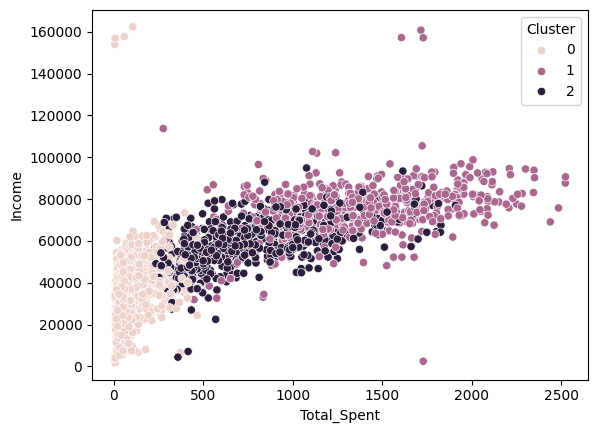

In [54]:
sns.scatterplot(data=cleaned_df, x='Total_Spent', y='Income', hue='Cluster')

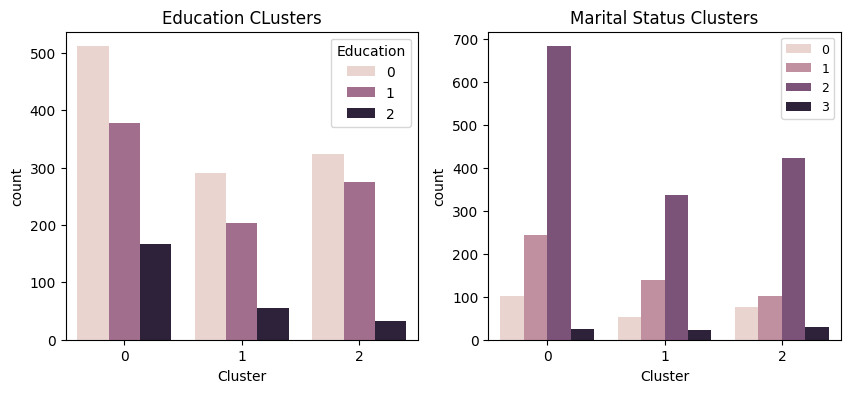

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=cleaned_df, x='Cluster', hue='Education', ax=ax1).set(title='Education CLusters')
sns.countplot(data=cleaned_df, x='Cluster', hue='Marital_Status', ax=ax2).set(title='Marital Status Clusters')
ax2.legend(fontsize=9)

In [56]:
marital_dict

{'Divorced': 0, 'Single': 1, 'Together': 2, 'Widow': 3}

In [57]:
education_dict

{'Graduate': 0, 'Postgrad': 1, 'Undergrad': 2}

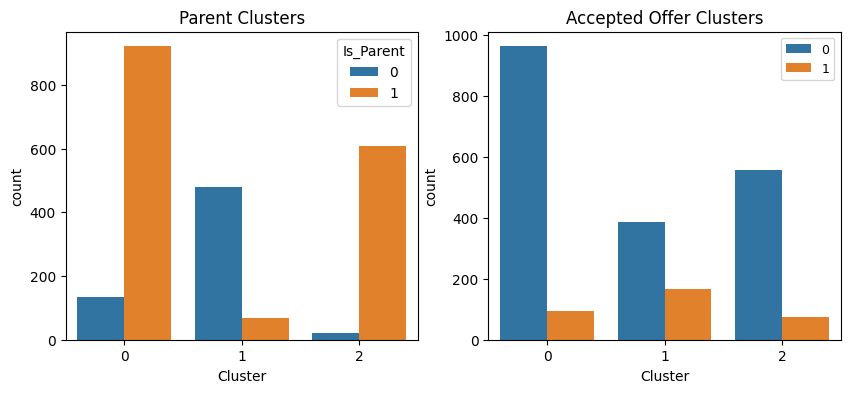

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=cleaned_df, x='Cluster', hue='Is_Parent', ax=ax1).set(title='Parent Clusters')
sns.countplot(data=cleaned_df, x='Cluster', hue='Response', ax=ax2).set(title='Accepted Offer Clusters')
ax2.legend(fontsize=9)

[Text(0.5, 1.0, 'Age Distribution by Cluster')]

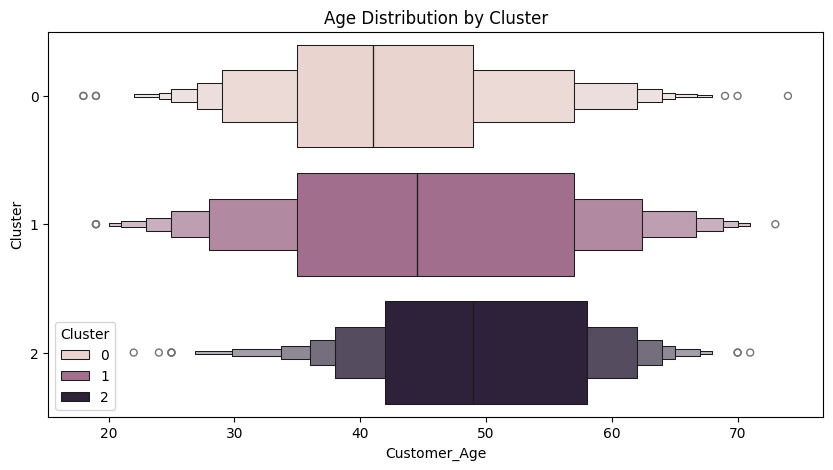

In [67]:
fig, ax = plt.subplots(figsize=(10,5))

# KMeans
sns.boxenplot(data=cleaned_df, x='Customer_Age', y='Cluster', orient='h', hue='Cluster').set(title='Age Distribution by Cluster')

## Conclusion

After going through the Exploratory Data Analysis on the raw customer data from Kaggle, scaling the data, using PCA to reduce the dimensionality, and finally applying KMeans clustering and visualizing the results, we've gained a good amount of insight from the data. With k set to 3, the clusters were not evenly distributed. Cluster 0 made up nearly 50% of the data, while cluster 1 and 2 were only about 28% and 25% respectively. 

### Cluster Analysis

#### Cluster 0:
* Mostly parents in mid 30s to 40s
* Almost all of them did NOT accept the offers
* Most had a graduate education and were 'together' with a partner
* They earned some of the higher income but also spent the least amount of money

#### Cluster 1:
* Mostly non-parents in mid 30s to mid 50s
* Most did not accept the offer but the distribution was closer than cluster 0
* Also highly educated with mostly graduate degrees and post-grad
* Most were together with a partner
* Much more spread out when comparing income to amount spent. Cluster 1 definitely spent much more than cluster 0 while earning a little more income on average

#### Cluster 2:
* Almost exclusively parents in mid 40s to upper 50s
* Most did not accept the offer, similar to cluster 0
* Also highly educated with most having graduate and post-grad
* Mostly together with a partner, by a wider margin than clusters 0 and 1
* Similar income range for cluster 1 but spent less on average than cluster 1